In [2]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

Loading data
CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.


In [3]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

#Normalize
train_images,test_images=train_images/255.0,test_images/255.0

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
class_names = ['airplanes','automobile','bird','cat','deer','dog','frog','horse','ship','trunk']

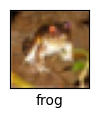

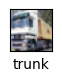

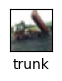

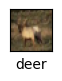

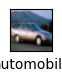

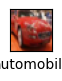

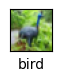

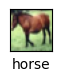

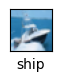

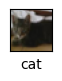

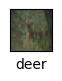

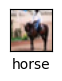

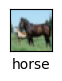

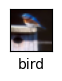

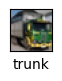

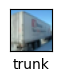

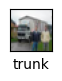

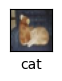

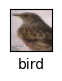

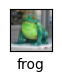

In [5]:
plt.figure(figsize=(12,30))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()


In [6]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [7]:
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 37.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully 

In [9]:
from sklearn.model_selection import GridSearchCV
#from scikeras.wrappers import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier

In [11]:
def create_model2(layers):
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D((2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(BatchNormalization())
  model.add(BatchNormalization())
  model.add(MaxPooling((2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(BatchNormalization())

  model.add(Flatten())
  for i,nodes in enumerate(layers):
    model.add(Dense(nodes,activation='relu'))
  model.add(Dense(nodes,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])
  return model
model2 = KerasClassifier(build_fn=create_model2,verbose=1)


<ipython-input-11-27931d8cb367>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=create_model2,verbose=1)


In [13]:
from re import VERBOSE
model2 =KerasClassifier(build_fn=create_model2,verbose=1)

<ipython-input-13-1a4b8a09638b>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 =KerasClassifier(build_fn=create_model2,verbose=1)


In [14]:
layers = [[64], [128],(256, 128),(512, 256, 128), (512, 256, 128, 64)]
grid_l = dict(layers=layers)
searcher_l = GridSearchCV(estimator=model2, cv=3, param_grid=grid_l, scoring="accuracy", verbose=1)

search_result_l = searcher_l.fit(train_images, train_labels, validation_data=(test_images, test_labels))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-11-27931d8cb367>", line 2, in create_model2
    model=Sequential()
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 199, in __new__
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 757, in __new__
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/version_utils.py", line 49, in __new__
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/generic_utils.py", line 556, in __getattr__
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/generic_utils.py", line 547, in _load
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'
